# Paper Plots
This notebook contains the same plots as other notebooks, but with formatting modified specifically for the paper draft

In [24]:
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib
import seaborn as sns;
import seaborn.objects as so;
import Units
from Units import g as g;
from Units import accUnit as accUnit
sns.set_theme()

### Momentum Fringes

In [56]:
data = np.loadtxt("../Data/Rust_Runs/Option2_Rust_Run2/test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]
AList= np.unique(datanew[:, 2])
VList = np.unique(datanew[:,3])
AVListIndex=datanew[:,0:2].astype(np.int64)
MomProb=datanew[:,4:] #may depend on file, please check
#np.savetxt("../dynamic_range/AVIndex.txt",AVIndex)
#np.savetxt("../dynamic_range/MomProb.txt",MomProb)

In [57]:


SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

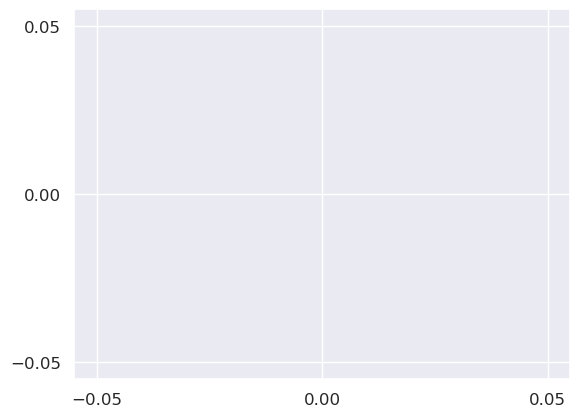

In [47]:
from matplotlib import ticker
plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)

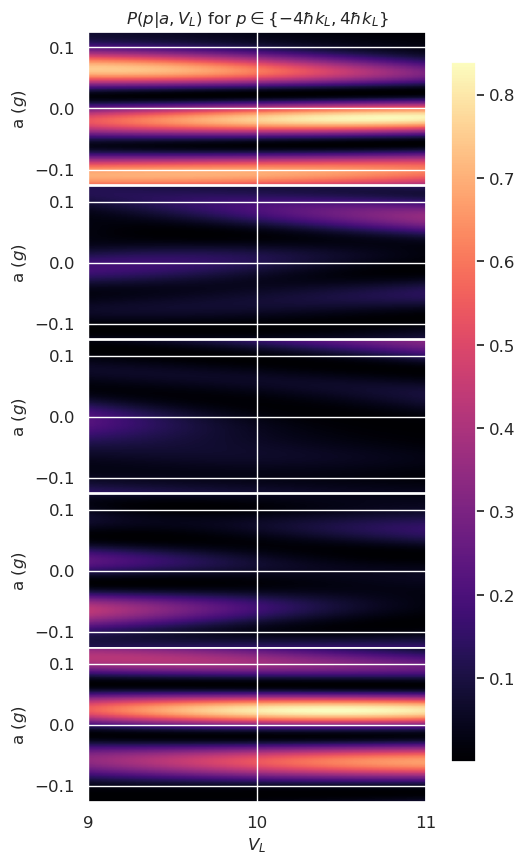

In [48]:
### For paper, reduce no. of components, vertically stacked
from matplotlib import ticker

fig=plt.figure(figsize=(5,10))
gs = fig.add_gridspec(5,1 ,hspace=0.001, wspace=0.)
axs = gs.subplots(sharex='col', sharey='row')


#axs[-1].axis("off");
# Setting the number of ticks 
plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)

minn = np.min(MomProb);
maxx = np.max(MomProb);
for i in range(3,8,1):
    ax = axs[i-3];
    im=ax.imshow(np.reshape(MomProb[:,i], (AList.size,VList.size)), cmap="magma",aspect="auto",extent =[VList[0],VList[-1],AList[0]*accUnit/g,AList[-1]*accUnit/g],  vmin=minn, vmax = maxx, label=str(2*i-10)+"$\hbar k_L$")

    ax.yaxis.set_major_locator(yticks)

    #ax.set_title(str(-10+2*i)+"$\hbar k_L$")
    ax.set_xlabel("$V_L$")
   # ax.set_ylabel("$p=$"+str(-10+2*i)+"$\hbar k_L$"+'\n'+"a $(g)$")
    ax.set_ylabel("a $(g)$")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im, cax=cbar_ax)
fig.colorbar(im,  cax = cbar_ax, orientation='vertical')

axs[0].set_title("$P(p|a,V_L)$ for $p\in \{-4\hbar k_L, 4\hbar k_L\}$")
for ax in fig.get_axes():
    ax.label_outer()
plt.grid(False)



#plt.savefig("2dfringes_g.png", bbox_inches='tight')
plt.show()




### JSD

In [7]:
from Divergences import KLDivergence;
from Divergences import JSDivergence;

In [58]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

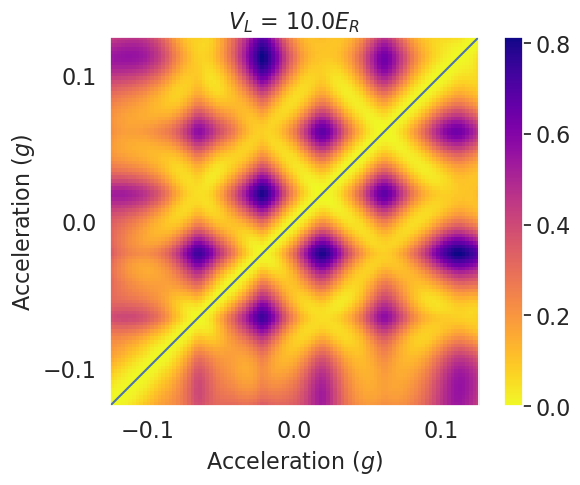

In [59]:
from matplotlib import ticker
momindices=np.where(AVListIndex[:,1]==int((VList.shape[0]-1)/2))[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])


plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]*accUnit/g, AList[indices_JS[0]]*accUnit/g)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title("$V_L$ = "+str(VList[int((VList.shape[0]-1)/2)])+"$E_R$")
plt.grid(False)
#plt.savefig("JS_acc.png")

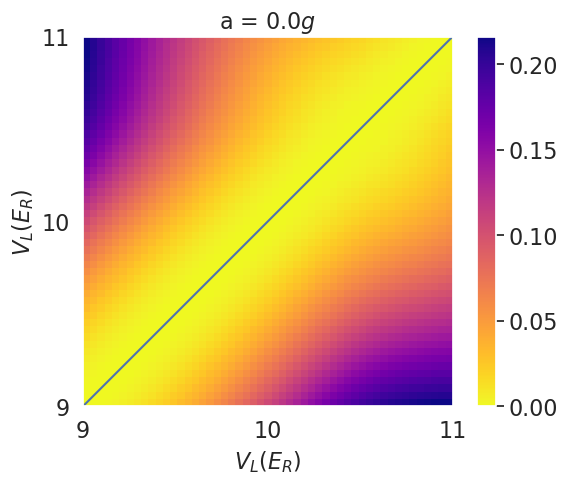

In [53]:
momindices=np.where(AVListIndex[:,0]==int((AList.shape[0]-1)/2))[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(VList[indices_JS[1]], VList[indices_JS[0]])
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("$V_L(E_R)$");
plt.ylabel("$V_L(E_R)$");
plt.title("a = "+ str(AList[50])+"$g$")
plt.grid(False)
plt.savefig("JS_latt.png")

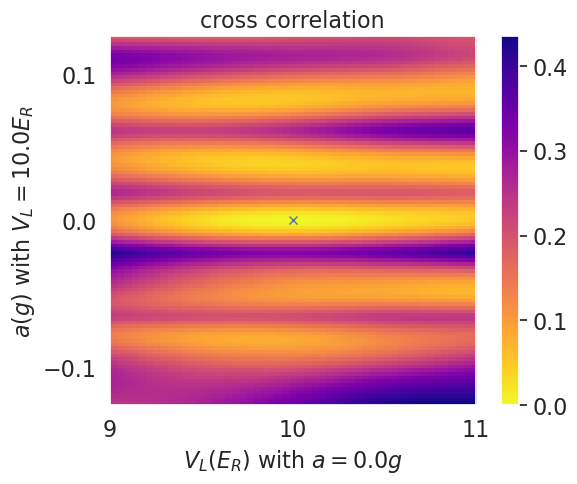

In [55]:
momindices_a=np.where(AVListIndex[:,1]==int((VList.shape[0]-1)/2))[0];
momproblist_a =MomProb[momindices_a];
indices_a = AVListIndex[momindices_a];

momindices_V=np.where(AVListIndex[:,0]==int((AList.shape[0]-1)/2))[0];
momproblist_V =MomProb[momindices_V];
indices_V = AVListIndex[momindices_V];

accindices = indices_a[:, 0];
acc = AList[accindices];

lattindices = indices_V[:, 1];
latt = VList[lattindices]

no_of_values_a = len(accindices);
no_of_values_V = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values_a, no_of_values_V)) ;

for i in accindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist_a[i], momproblist_V[j])

plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], acc[-1]*accUnit/g, acc[0]*accUnit/g ], aspect=8)
indices_JS = np.where(JSDivergenceMatrix==0.0)
plt.plot(VList[indices_JS[1]],AList[indices_JS[0]], 'x')
plt.gca().invert_yaxis()
#plt.plot(AList[indices_JS[0]],VList[indices_JS[1]])
plt.xlabel("$V_L(E_R)$ with $a=$"+str(AList[50])+"$g$")
plt.ylabel("$a(g)$ with $V_L=$"+str(VList[25])+"$E_R$")
plt.colorbar()
plt.title("cross correlation")
plt.grid(False)
plt.savefig("JS_cross_g.png")


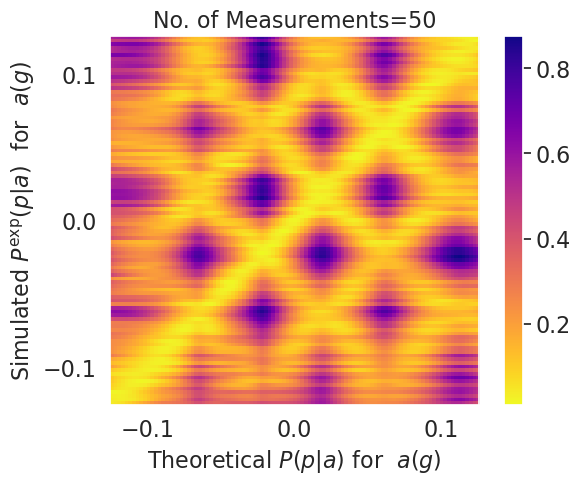

In [56]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));

P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
for i in range(len(AList)):
    P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
    #No errors

    Runs=50; # How many simulated data do we want
    outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
    unique, frequency = np.unique(outcomes, return_counts = True);
    his = np.bincount(outcomes,minlength=11)
    P_simulated[i] = his/np.sum(his)

P_simulated[P_simulated==0.0]= 1.0*10**(-80);


acc = AList

no_of_values = len(AList);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in range(no_of_values):
    for j in range(no_of_values):
        JSDivergenceMatrix [i][j]= JSDivergence(P_simulated[i], P_actual[j])

plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]  *Units.accUnit/Units.g, acc[-1] *Units.accUnit/Units.g   *1.0, acc[-1] *Units.accUnit/Units.g   *1.0, acc[0]  *Units.accUnit/Units.g   *1.0])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]    *1.0, AList[indices_JS[0]]    *1.0)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Theoretical $P(p|a)$ for  $a(g)$")
plt.ylabel("Simulated $P^{\mathrm{exp}}(p|a)$  for  $a(g)$")
plt.grid(False)
plt.title("No. of Measurements="+str(Runs))
plt.savefig("expJS_acc_50measurements.png")

Text(0.5, 1.0, 'CFI and JSD comparsion for different $a(g)$')

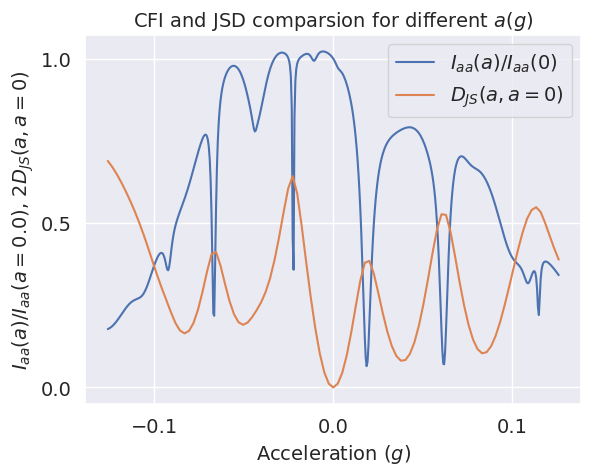

In [60]:
import seaborn as sns;
import seaborn.objects as so;
import Units
from Units import g as g;
from Units import accUnit as accUnit
sns.set_theme()

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)
yticks = ticker.MaxNLocator(3)

cfi_data = np.loadtxt("../Data/Rust_Runs/testing_cfi/test.txt")
cfi_data  = cfi_data[ np.lexsort((cfi_data[:,1],cfi_data[:,0])) ]

plt.plot(cfi_data[:,2]*(accUnit/g), cfi_data[:,4]/cfi_data[250,4], label="$I_{aa}(a)/I_{aa}(0)$")
plt.plot(AList*Units.accUnit/Units.g, 2*JSDivergenceMatrix[50,:], label="$D_{JS}(a,a=0)$")
plt.ylabel("$I_{aa}(a)/I_{aa}(a=0.0)$, $2D_{JS}(a,a=0)$")
plt.xlabel("Acceleration $(g)$")
plt.legend()
#plt.title("$I_{aa}(a)/I_{aa}(0)$ and $2D_{JS}(a,a=0)$")
plt.title("CFI and JSD comparsion for different $a(g)$")

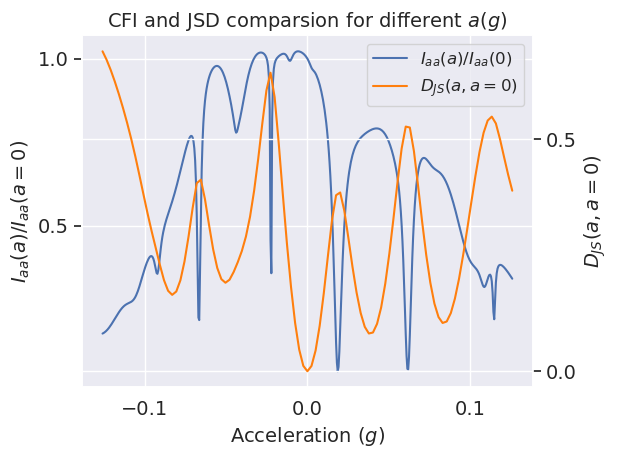

In [69]:
import seaborn as sns;
import seaborn.objects as so;
import Units
from Units import g as g;
from Units import accUnit as accUnit
sns.set_theme()

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


cfi_data = np.loadtxt("../Data/Rust_Runs/testing_cfi/test.txt")
cfi_data  = cfi_data[ np.lexsort((cfi_data[:,1],cfi_data[:,0])) ]

fig = plt.figure()
ax1 = fig.add_subplot(111)


plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)
yticks = ticker.MaxNLocator(3)

lns1=ax1.plot(cfi_data[:,2]*(accUnit/g), cfi_data[:,4]/cfi_data[250,4], label="$I_{aa}(a)/I_{aa}(0)$")
ax1.set_ylabel("$I_{aa}(a)/I_{aa}(a=0)$")
ax1.set_xlabel("Acceleration $(g)$")
#plt.title("$I_{aa}(a)/I_{aa}(0)$ and $2D_{JS}(a,a=0)$")
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
lns2=ax2.plot(AList*Units.accUnit/Units.g, 2*JSDivergenceMatrix[50,:], label="$D_{JS}(a,a=0)$", color= "tab:orange")

ax2.set_ylabel("$D_{JS}(a,a=0)$")
plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)
yticks = ticker.MaxNLocator(3)
plt.title("CFI and JSD comparsion for different $a(g)$")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("CFInQFI.png")
plt.show()

In [53]:
data = np.loadtxt("../Data/Rust_Runs/dynamic_range/Run2/test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]
AList= np.unique(datanew[:, 2])
VList = np.unique(datanew[:,3])
AVListIndex=datanew[:,0:2].astype(np.int64)
MomProb=datanew[:,4:]

momindices=np.where(AVListIndex[:,1]==int((VList.shape[0]-1)/2))[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])


##plt.locator_params(axis='both', nbins=3) 
from matplotlib import ticker
plt.locator_params(axis='both', nbins=3) 
yticks = ticker.MaxNLocator(3)
yticks = ticker.MaxNLocator(3)

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]*accUnit/g, acc[-1]*accUnit/g, acc[-1]*accUnit/g, acc[0] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]*accUnit/g, AList[indices_JS[0]]*accUnit/g)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title("$V_L$ = "+str(VList[int((VList.shape[0]-1)/2)])+"$E_R$")
plt.grid(False)
plt.savefig("JS_acc_longer.png")

KeyboardInterrupt: 

In [70]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

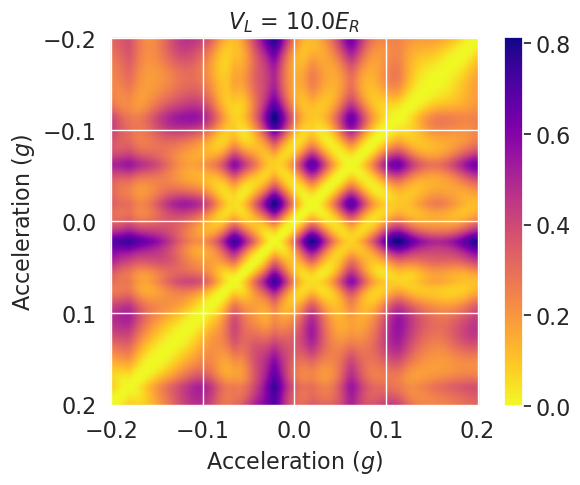

In [73]:
data = np.loadtxt("../Data/Rust_Runs/dynamic_range/Run2/test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]
AList= np.unique(datanew[:, 2])
VList = np.unique(datanew[:,3])
AVListIndex=datanew[:,0:2].astype(np.int64)
MomProb=datanew[:,4:]

momindices=np.where(AVListIndex[:,1]==int((VList.shape[0]-1)/2))[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

start_index = 410;
end_index = 590
no_of_values = len(accindices[start_index:end_index+1]);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices[start_index:end_index+1]:
    for j in accindices[start_index:end_index+1]:
        JSDivergenceMatrix [i-start_index][j-start_index]= JSDivergence(momproblist[i], momproblist[j])


plt.locator_params(axis='both', nbins=5) 
yticks = ticker.MaxNLocator(5)

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[start_index]*accUnit/g, acc[end_index]*accUnit/g, acc[start_index]*accUnit/g, acc[end_index] *accUnit/g])
indices_JS = np.where(JSDivergenceMatrix==0)
#plt.plot(AList[indices_JS[1]]*accUnit/g, AList[indices_JS[0]]*accUnit/g)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Acceleration ($g$)")
plt.ylabel("Acceleration ($g$)")
plt.title("$V_L$ = "+str(VList[int((VList.shape[0]-1)/2)])+"$E_R$")
plt.grid(True)
fig.tight_layout()
plt.savefig("JS_acc_longer.png", bbox_inches="tight")

In [17]:
accindices.shape

(1001,)